In [2]:
import numpy as np
import matplotlib.pyplot as plt

L_packet = 136 for T_send = 1 * T_sample
L_packet = 208 for T_send = 4 * T_sample
L_packet = 256 for T_send = 6 * T_sample
L_packet = 304 for T_send = 8 * T_sample
L_packet = 400 for T_send = 12 * T_sample


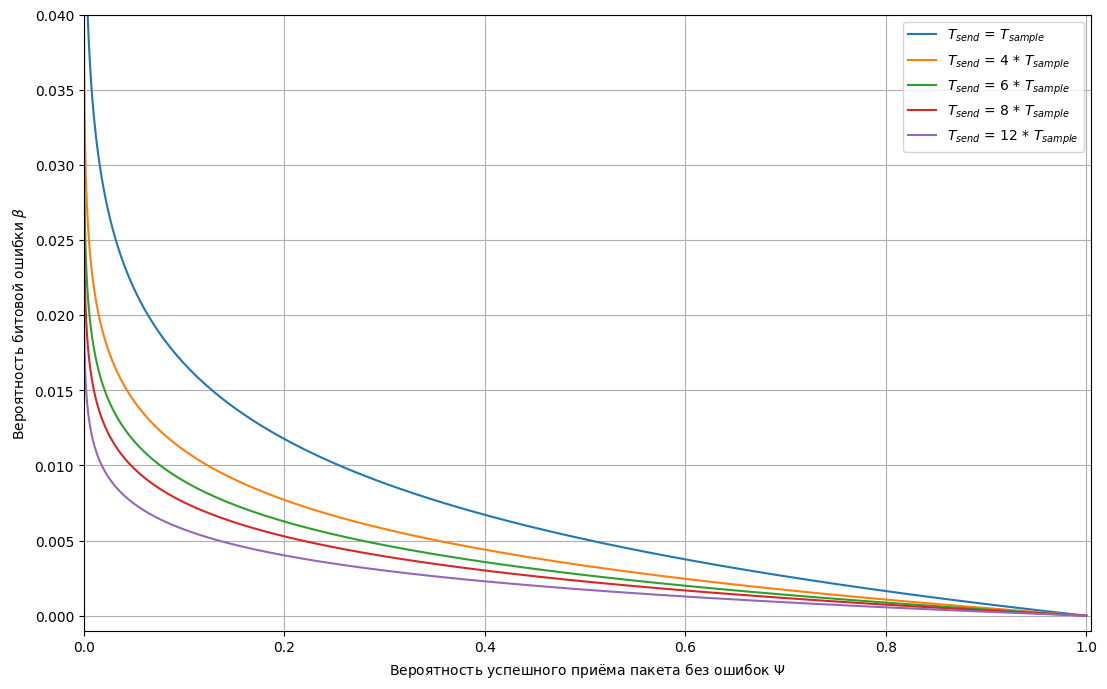

In [3]:
L_pre = 32
L_sync = 32
L_addr = 16
L_m = 24
L_fcs = 16


L_servicedata = L_pre + L_sync + 2*L_addr + L_fcs

beta = np.linspace(0, 1, 10000)

plt.figure(figsize=(13,8))

L_packet = L_servicedata + 1 * L_m
psi = (1 - beta) ** L_packet
print(f"L_packet = {L_packet} for T_send = {1} * T_sample")
plt.plot(psi, beta, label=f"$T_{{send}}$ = $T_{{sample}}$")



for i in range(1, 13, 1):
    if((i % 4) == 0 or i == 6):
        L_packet = L_servicedata + i * L_m
        psi = (1 - beta) ** L_packet
        print(f"L_packet = {L_packet} for T_send = {i} * T_sample")
        plt.plot(psi, beta, label=f"$T_{{send}}$ = {i} * $T_{{sample}}$")


plt.ylabel("Вероятность битовой ошибки $\\beta$")
plt.xlabel("Вероятность успешного приёма пакета без ошибок $\\Psi$")
plt.ylim((-0.001, 0.04))
plt.xlim((0, 1.005))
plt.grid()
plt.legend()
# plt.savefig("./Homework/1.png")

L_packet = 256 for T_send = 6 * T_sample
0.00020034435958926622


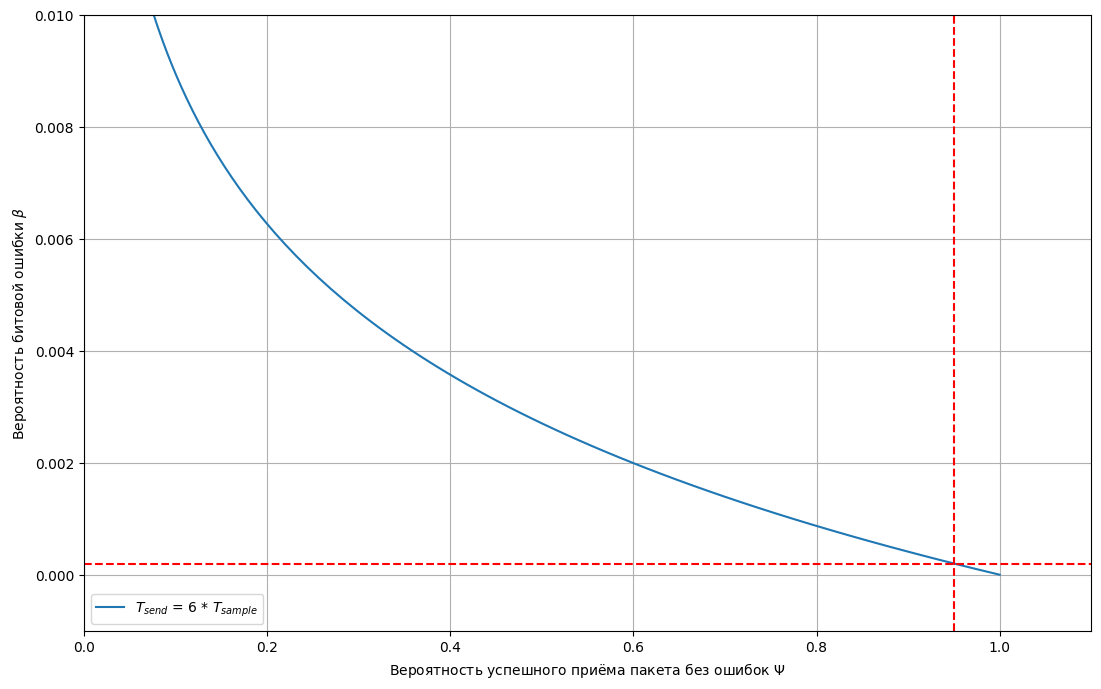

In [4]:
 # T_send = 6 * T_sample, psi = 0.9, beta = 0.0004
plt.figure(figsize=(13,8))

T_chosen = 6
L_packet = L_servicedata + T_chosen * L_m
psi = (1 - beta) ** L_packet
print(f"L_packet = {L_packet} for T_send = {T_chosen} * T_sample")
plt.plot(psi, beta, label=f"$T_{{send}}$ = {T_chosen} * $T_{{sample}}$")

t_psi = 0.95
plt.axvline(x=t_psi, color='r', linestyle='--')

t_beta = 1 - np.power(t_psi, 1/L_packet)

print(t_beta)

plt.axhline(y=t_beta, color='r', linestyle='--')


plt.ylabel("Вероятность битовой ошибки $\\beta$")
plt.xlabel("Вероятность успешного приёма пакета без ошибок $\\Psi$")
plt.ylim((-0.001, 0.01))
plt.xlim((0, 1.1))
plt.grid()
plt.legend()

In [5]:
from scipy.special import erfcinv
# рассчитаем мощность шума
P_s_dBm = -90
P_s_absolute = 10**(P_s_dBm/10)/1000
R = 500*10**3
W = 2*R
beta_s = 10**-2
P_n_absolute = P_s_absolute*W/(R*erfcinv(2*beta_s)**2)

P_n_dBm = 10*np.log10(P_n_absolute/0.001)
print(P_s_absolute)
print(P_n_absolute)
print(P_n_dBm)

1e-12
7.39112717544404e-13
-91.3128932496833


In [6]:
# рассчитаем мощность принятого сигнала при t_beta
P_rx_proj_absolute = P_n_absolute*R*(erfcinv(2*t_beta)**2)/W

P_rx_proj_dBm = 10*np.log10(P_rx_proj_absolute/0.001)

print(P_rx_proj_dBm)

-86.35433638272119


In [7]:
# рассчитаем d_max
c = 299792458
f = 868.95*10**6
lambda_wave = c/f
EIRP = 164*10**-3
G = 15.84
# P_t_absolute = 10.35*10**-3
P_t_absolute = EIRP
P_t_dBm = 10*np.log10(P_t_absolute/0.001)

d_max = lambda_wave/(4*np.pi)*np.sqrt(EIRP*G/P_rx_proj_absolute)

print(d_max)

29082.543284317395


In [8]:
# рассчитаем средние потери
alpha = 3
sigma = 5
d_0 = 1
P_r_0_absolute = EIRP*G*(lambda_wave/(4*np.pi*d_0))**2
# PL_average_d_0 = 10*np.log10(P_t_absolute/P_r_0_absolute)
PL_average_d_0 = 10*np.log10(EIRP/P_r_0_absolute)
print(PL_average_d_0)
P_r_0_dBm = 10*np.log10(P_r_0_absolute/0.001)
PG_average_d_0_2 = 10*np.log10(G*G*np.square(lambda_wave/(4*np.pi*d_0)))
print(P_t_dBm-P_r_0_dBm)
# PL_0 = 10 * np.log10(G * G * np.power((4 * np.pi * d_0) / lambda_wave, 2))
# print(PL_0)
print(P_r_0_absolute)

19.2301272004434
19.2301272004434
0.001958083140214833


578.290292902929


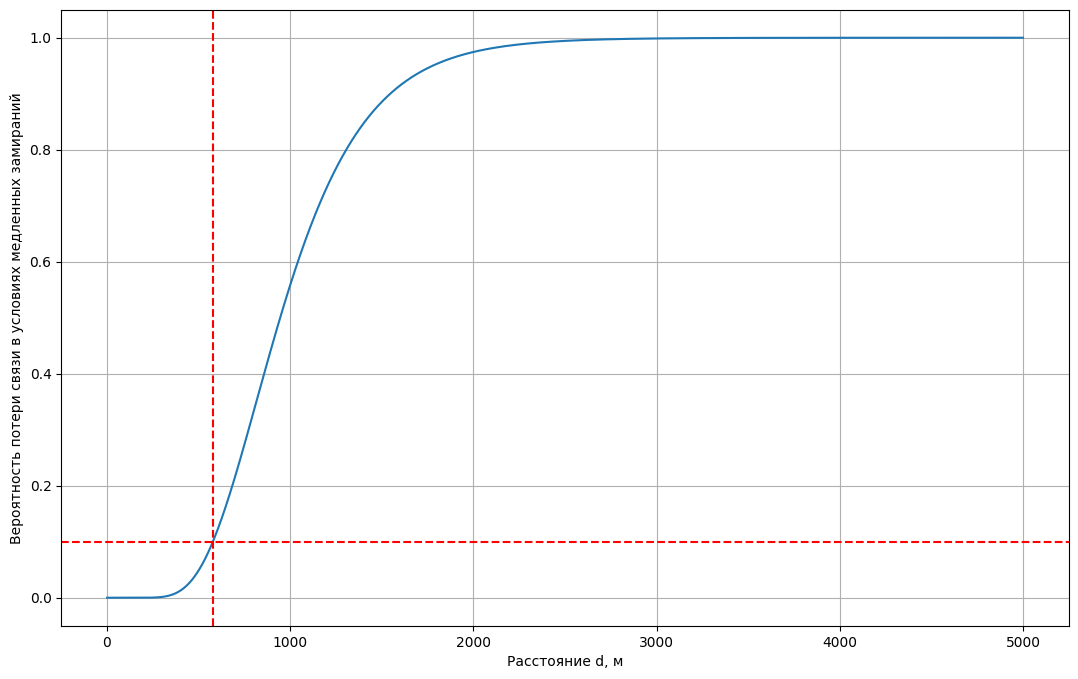

In [9]:
from scipy.special import erf
def qfunc(x):
    return 0.5-0.5*erf(x/np.sqrt(2))

d = np.linspace(d_0, 5000, 100000)
Xi = np.random.normal(0, sigma, size=len(d))

ConnectionLossChance = 1 - qfunc((P_rx_proj_dBm - P_t_dBm+PL_average_d_0+10*alpha*np.log10(d/d_0))/sigma)

tempd = d[0]
tempConnectionLossChance = ConnectionLossChance[0]

for i in range(0, len(d)-1):
    if ConnectionLossChance[i+1]>0.1:
        tempConnectionLossChance = ConnectionLossChance[i]
        tempd = d[i]
        break
print(tempd)


plt.figure(figsize=(13,8))
plt.plot(d, ConnectionLossChance)
plt.grid()
plt.axhline(y=0.1, color='r', linestyle='--')
plt.axvline(x=tempd, color='r', linestyle='--')
plt.xlabel("Расстояние d, м")
plt.ylabel("Вероятность потери связи в условиях медленных замираний")

PL_d=PL_average_d_0+10*alpha*np.log10(d/d_0)+Xi
P_rx_dBm = P_t_dBm - PL_d



387.27659276592766
-74.7223261826243
387.284643153592
11.631739370204201


Text(0, 0.5, 'Вероятность потери связи в условиях медленных замираний')

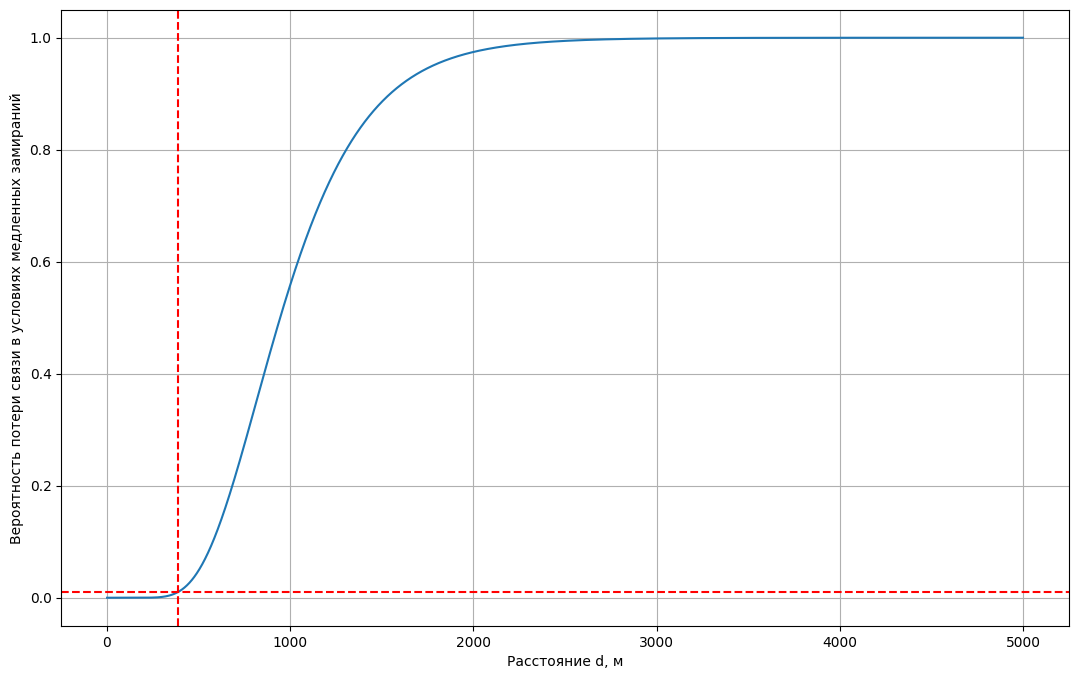

In [10]:
from scipy.stats import norm
tempd2 = d[0]
tempConnectionLossChance = ConnectionLossChance[0]

for i in range(0, len(d)-1):
    if ConnectionLossChance[i+1]>0.01:
        tempConnectionLossChance = ConnectionLossChance[i]
        tempd2 = d[i]
        break
print(tempd2)

PL_d99 = PL_average_d_0+10*alpha*np.log10(tempd2/d_0)

P_rx_99_dBm = P_t_dBm - PL_d99

print(P_rx_99_dBm)
delta_d = d_0*10**((sigma*(-norm.ppf(0.99))-P_rx_proj_dBm+P_t_dBm-PL_average_d_0)/(10*alpha))

print(delta_d)
delta_PL = PL_average_d_0+10*alpha*np.log10(delta_d/d_0)
delta_P_rx = P_t_dBm - delta_PL
PowerReserve = delta_P_rx - P_rx_proj_dBm
print(PowerReserve)

plt.figure(figsize=(13,8))
plt.plot(d, ConnectionLossChance)
plt.grid()
plt.axhline(y=0.01, color='r', linestyle='--')
plt.axvline(x=tempd2, color='r', linestyle='--')
# plt.ylim((-0.001,0.1))
plt.xlabel("Расстояние d, м")
plt.ylabel("Вероятность потери связи в условиях медленных замираний")


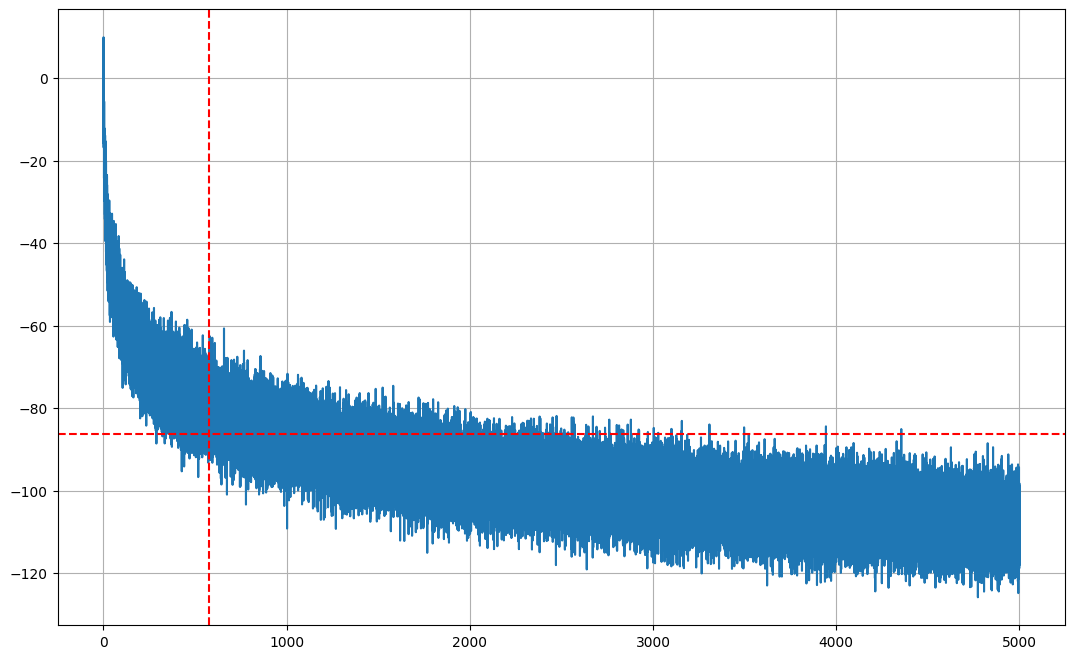

In [11]:
plt.figure(figsize=(13,8))
plt.plot(d, P_rx_dBm)
plt.grid()
plt.axhline(y=P_rx_proj_dBm, color='r', linestyle='--')
plt.axvline(x=tempd, color='r', linestyle='--')

Text(0, 0.5, 'Вероятность потери связи в условиях быстрых замираний')

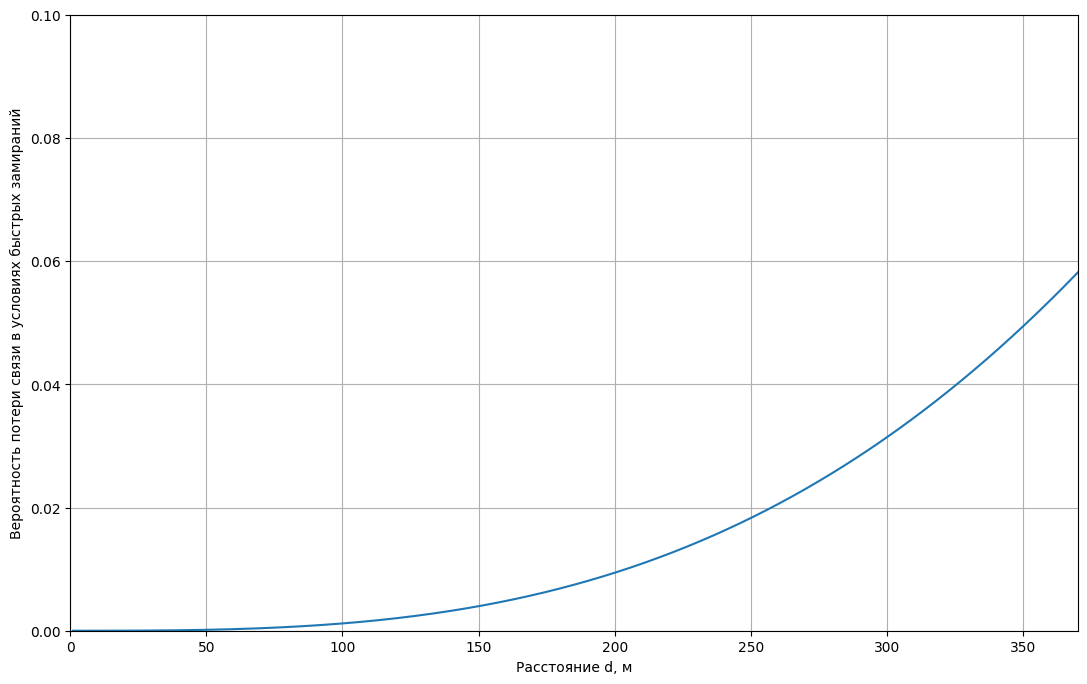

In [17]:

PL_d=PL_average_d_0+10*alpha*np.log10(d/d_0)
P_rx_average_dBm = P_t_dBm - PL_d

P_rx_average_absolute = 10**(P_rx_average_dBm/10)/1000

ConnectionLossChanceRelay = 1-np.exp(-P_rx_proj_absolute/P_rx_average_absolute)

plt.figure(figsize=(13,8))
plt.plot(d, ConnectionLossChanceRelay)
plt.grid()
plt.xlabel("Расстояние d, м")
plt.ylabel("Вероятность потери связи в условиях быстрых замираний")


Text(0, 0.5, 'Частота возникновения замираний $L_Z$, Гц')

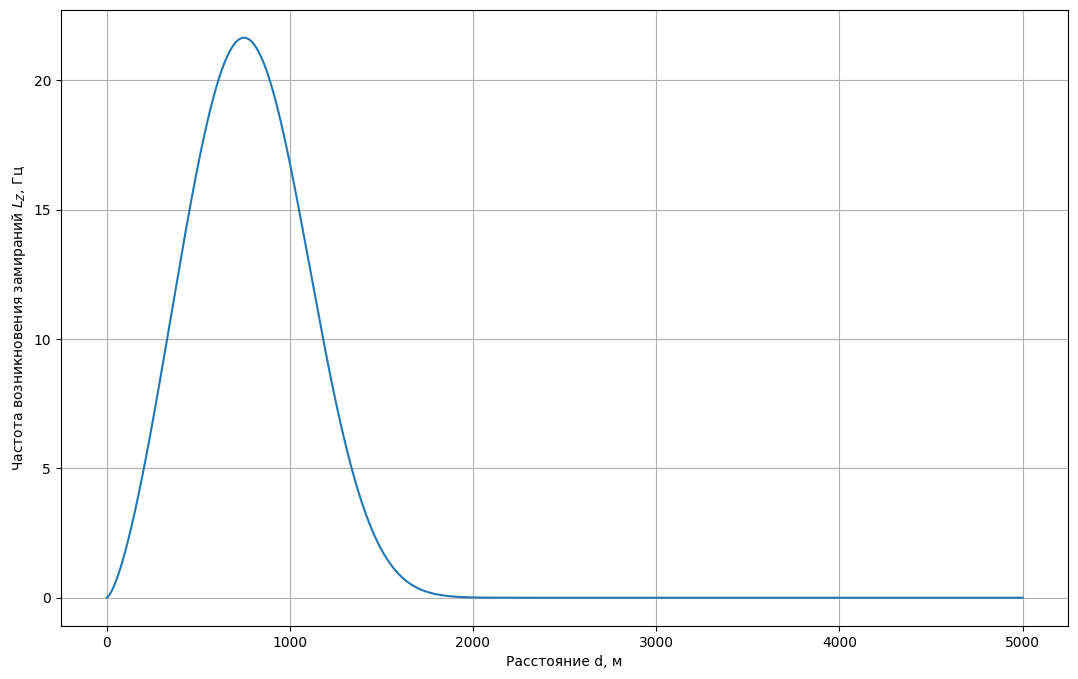

In [13]:
v = 25
v_SI = 25*1000/60/60
f_Dm = v_SI/lambda_wave

rho = np.sqrt(P_rx_proj_absolute/P_rx_average_absolute)

L_z=np.sqrt(2*np.pi)*f_Dm*rho*np.exp(-rho**2)


plt.figure(figsize=(13,8))
plt.plot(d, L_z)
plt.grid()
plt.xlabel("Расстояние d, м")
plt.ylabel("Частота возникновения замираний $L_Z$, Гц")

Text(0, 0.5, 'Средняя длительность замираний $\\bar{t}_Z$, с')

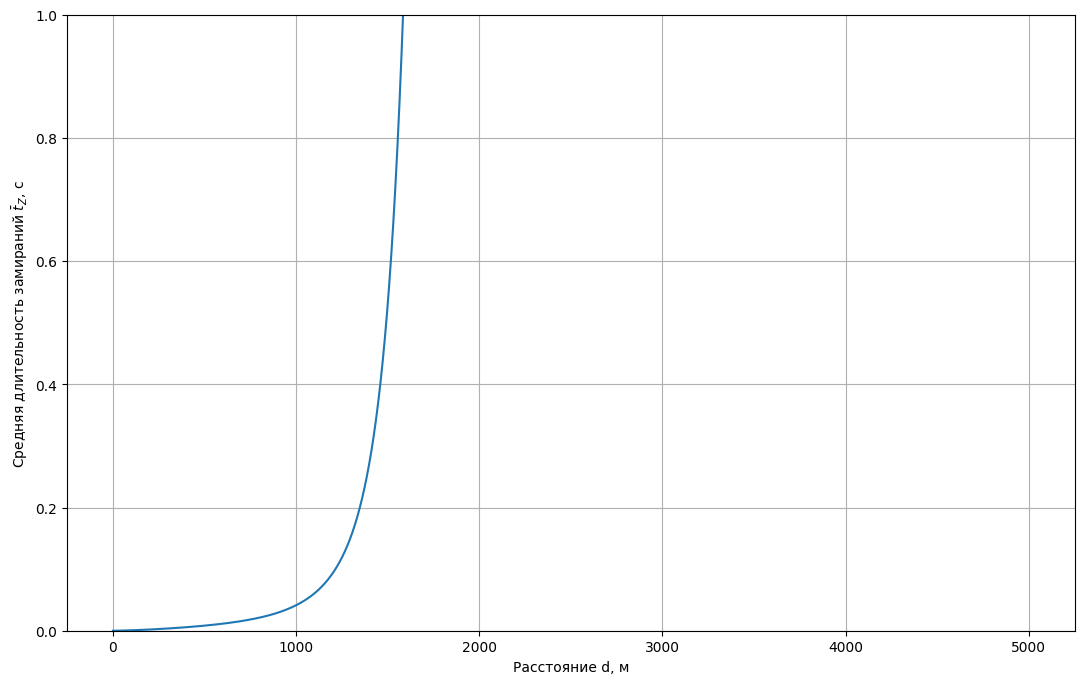

In [14]:
t_z = (np.exp(rho**2)-1)/(rho*f_Dm*np.sqrt(2*np.pi))
# t_z = (np.exp(np.power(rho, 2)) - 1) / (rho * f_Dm * np.sqrt(2 * np.pi))

plt.figure(figsize=(13,8))
plt.plot(d, t_z)
plt.ylim((0, 1))
plt.grid()
plt.xlabel("Расстояние d, м")
plt.ylabel("Средняя длительность замираний $\\bar{t}_Z$, с")


2e-06
0.000512
Длительность передачи бита:   2e-06
Длительность передачи пакета: 0.000512
Расстояние, на котором длительность замирания равна длительности бита:   2.0498004980049798
Расстояние, на котором длительность замирания равна длительности пакета: 82.63448634486345
Частота замираний на расстоянии длительности замирания равной длительности бита: [0.00509139]
Частота замираний на расстоянии длительности замирания равной длительности пакета: [1.30233108]
Длительность замирания на хз: [5.37756696e-03 5.37868045e-03 5.37979405e-03 ... 2.47086663e+61
 2.48180640e+61 2.49279482e+61]
Частота замираний на расстоянии длительности хз: [1.23466278e+01 1.23486896e+01 1.23507514e+01 ... 4.04716300e-62
 4.02932317e-62 4.01156161e-62]
(array([1633], dtype=int64),)
[0.06639482 0.06641966 0.0664445  ... 1.         1.         1.        ]


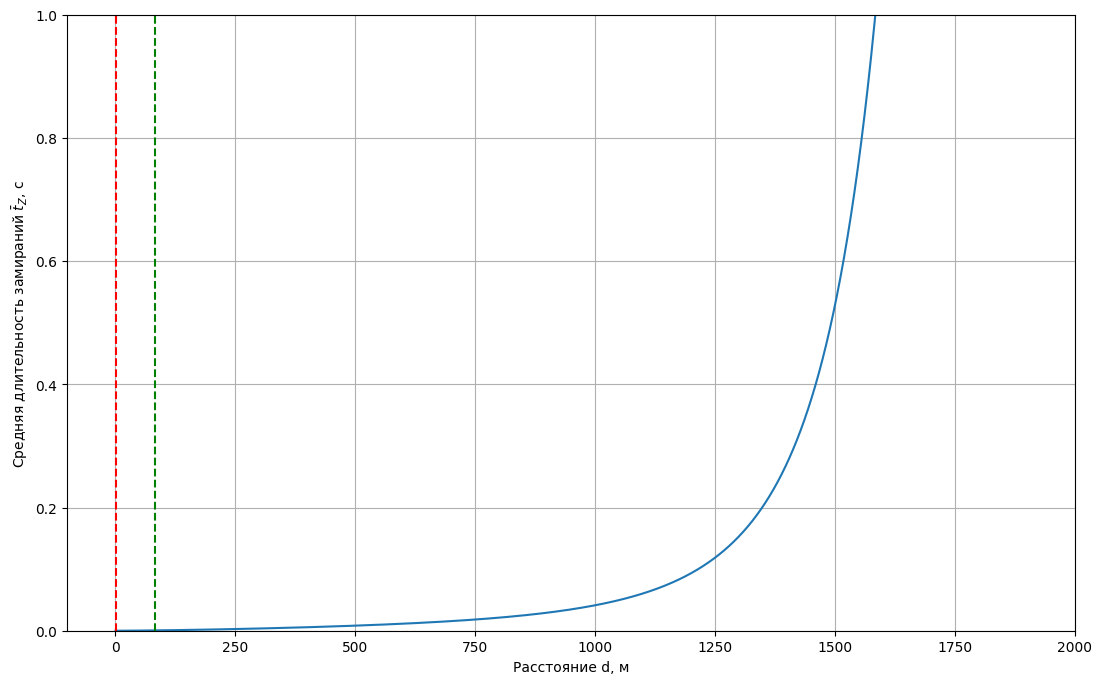

In [15]:
import pandas as pd

T_b = 1/R
T_p = 256*T_b
print(T_b)
print(256/R)


print(f"Длительность передачи бита:   {T_b}")
print(f"Длительность передачи пакета: {T_p}")

d_zb = d[np.sum(t_z < T_b)]
d_zp = d[np.sum(t_z < T_p)]
index_q = np.where(d >= 387.28)
index_b = np.where(d == d_zb)
index_p = np.where(d == d_zp)
print(f"Расстояние, на котором длительность замирания равна длительности бита:   {d_zb}")
print(f"Расстояние, на котором длительность замирания равна длительности пакета: {d_zp}")
print(f"Частота замираний на расстоянии длительности замирания равной длительности бита: {L_z[index_b]}")
print(f"Частота замираний на расстоянии длительности замирания равной длительности пакета: {L_z[index_p]}")
print(f"Длительность замирания на хз: {t_z[index_q]}")
print(f"Частота замираний на расстоянии длительности хз: {L_z[index_q]}")
print(index_p)
print(ConnectionLossChanceRelay[index_q])
plt.figure(figsize=(13,8))
plt.plot(d, t_z)
plt.ylim((0, 1))
xlim = plt.gca().get_xlim()
plt.xlim(-100, 2000)
plt.grid()
plt.xlabel("Расстояние d, м")
plt.ylabel("Средняя длительность замираний $\\bar{t}_Z$, с")
plt.axvline(x=d_zb, color='r', linestyle='--')
plt.axvline(x=d_zp, color='g', linestyle='--')